In [1]:
import numpy as np
import tensorflow as tf
import os
from PIL import Image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import img_to_array, load_img,ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split



2024-03-28 23:50:56.628886: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-28 23:50:56.683246: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 23:50:56.683286: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 23:50:56.684472: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-28 23:50:56.694428: I tensorflow/core/platform/cpu_feature_guar

In [2]:
class_labels = os.listdir('Dataset/Training')
class_labels

['meningioma', 'glioma', 'pituitary', 'notumor']

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('Dataset/Training', 
                                                 target_size = (256, 256), 
                                                 batch_size = 16,
                                                 color_mode = 'grayscale',
                                                 class_mode = 'categorical',
                                                 shuffle = True)

test_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.5)
dev_set = test_datagen.flow_from_directory('Dataset/Testing', 
                                                 target_size = (256, 256), 
                                                 batch_size = 16,
                                                 class_mode = 'categorical',
                                                 color_mode = 'grayscale',
                                                 shuffle = True,
                                                 subset = "validation")

test_set = test_datagen.flow_from_directory('Dataset/Testing',
                                                   target_size = (256, 256),
                                                   batch_size = 16,
                                                   class_mode = 'categorical',
                                                   color_mode = 'grayscale',
                                                   shuffle = False,
                                                   subset = "testing")

Found 5712 images belonging to 4 classes.
Found 656 images belonging to 4 classes.
Found 655 images belonging to 4 classes.


In [4]:
type(training_set)

keras.src.preprocessing.image.DirectoryIterator

## VGG Arch

In [5]:



# Assuming your input shape is (height, width, channels)
input_shape = (256, 256,1)

# Define the VGG-16 model for binary classification
model = Sequential([
    # Block 1
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    # Block 2
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    # Block 3
    # Conv2D(256, (3, 3), activation='relu', padding='same'),
    # Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    # Block 4
    # Conv2D(512, (3, 3), activation='relu', padding='same'),
    # Conv2D(512, (3, 3), activation='relu', padding='same'),
    # Conv2D(512, (3, 3), activation='relu', padding='same'),
    # MaxPooling2D((2, 2)),

    # # Block 5
    # Conv2D(512, (3, 3), activation='relu', padding='same'),
    # Conv2D(512, (3, 3), activation='relu', padding='same'),
    # Conv2D(512, (3, 3), activation='relu', padding='same'),
    # MaxPooling2D((2, 2)),

    # Flatten and dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Binary classification with sigmoid activation
])

# Compile the model with binary crossentropy loss and an appropriate optimizer
model.compile(optimizer=Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model architecture
model.summary()


2024-03-28 23:51:01.597359: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-28 23:51:01.671265: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-28 23:51:01.671331: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-28 23:51:01.676494: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-28 23:51:01.676588: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 128)       0         
 g2D)                                                   

In [6]:
with tf.device('/gpu:1'):
    model.fit(training_set,validation_data=dev_set,epochs=10)

Epoch 1/10


2024-03-28 23:51:03.502777: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-28 23:51:03.856191: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-28 23:51:05.283307: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-28 23:51:05.788335: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3f3cd52da0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-28 23:51:05.788400: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-03-28 23:51:05.796612: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1711650065.864949  592277 devic

357/357 [==============================] - 63s 136ms/step - loss: 0.9225 - accuracy: 0.5882 - val_loss: 0.7066 - val_accuracy: 0.6829
Epoch 2/10
357/357 [==============================] - 47s 132ms/step - loss: 0.5882 - accuracy: 0.7595 - val_loss: 0.4006 - val_accuracy: 0.8034
Epoch 3/10
357/357 [==============================] - 47s 132ms/step - loss: 0.4693 - accuracy: 0.8107 - val_loss: 0.3246 - val_accuracy: 0.8537
Epoch 4/10
357/357 [==============================] - 47s 131ms/step - loss: 0.3692 - accuracy: 0.8498 - val_loss: 0.2676 - val_accuracy: 0.8872
Epoch 5/10
357/357 [==============================] - 48s 134ms/step - loss: 0.2778 - accuracy: 0.8976 - val_loss: 0.2631 - val_accuracy: 0.8979
Epoch 6/10
357/357 [==============================] - 48s 135ms/step - loss: 0.2160 - accuracy: 0.9191 - val_loss: 0.1966 - val_accuracy: 0.9177
Epoch 7/10
357/357 [==============================] - 47s 132ms/step - loss: 0.1925 - accuracy: 0.9331 - val_loss: 0.2304 - val_accuracy: 0.9

In [7]:
# Assuming `x_test` and `y_test` are your test data and labels
test_loss, test_accuracy = model.evaluate(test_set)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


41/41 [==============================] - 4s 86ms/step - loss: 0.1974 - accuracy: 0.9527
Test Loss: 0.19742126762866974, Test Accuracy: 0.9526717662811279


In [8]:
y_pred = model.predict(test_set)
y_pred

41/41 [==============================] - 2s 47ms/step


array([[9.9999988e-01, 8.6570864e-08, 6.4851502e-10, 4.0587156e-09],
       [9.9999750e-01, 2.3664215e-06, 2.3279287e-09, 8.2812015e-08],
       [9.9999940e-01, 6.4282921e-07, 3.2567490e-13, 5.2343789e-11],
       ...,
       [1.2488873e-04, 2.2771258e-02, 1.4686700e-03, 9.7563517e-01],
       [7.1879173e-13, 1.8023225e-07, 4.4868678e-09, 9.9999976e-01],
       [1.9198097e-14, 2.7381145e-10, 1.7823410e-13, 1.0000000e+00]],
      dtype=float32)

In [9]:
y_pred_new = 1*(y_pred > 0.5)
y_pred_new

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [10]:
y_test_set = np.concatenate([test_set.next()[1] for i in range(test_set.__len__())])
y_test_set = y_test_set.astype(int)
y_test_set = y_test_set.reshape(len(y_test_set), 4)
print(y_test_set)

[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]


In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score
import numpy as np

# Assuming y_test and y_pred are your true and predicted labels respectively
y_test_decoded = np.argmax(y_test_set, axis=1)
y_pred_decoded = np.argmax(y_pred_new, axis=1)

cm = confusion_matrix(y_test_decoded, y_pred_decoded)
acc= accuracy_score(y_test_set, y_pred_new)
print(acc,"\n")
print(cm)


0.9526717557251908 

[[142   8   0   0]
 [  0 137  12   4]
 [  0   0 201   1]
 [  1   5   0 144]]


## ResNet Arch

In [12]:

def conv_block(x, filters, kernel_size=(3, 3), strides=(1, 1), padding='same'):
    x = tf.keras.layers.Conv2D(filters, kernel_size, strides=strides, padding=padding, use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    return x

def residual_block(x, filters, kernel_size=(3, 3), strides=(1, 1), padding='same'):
    shortcut = x

    x = conv_block(x, filters, kernel_size, strides, padding)
    x = conv_block(x, filters, kernel_size, strides=(1, 1), padding='same')

    if strides != (1, 1) or filters != shortcut.shape[-1]:
        shortcut = tf.keras.layers.Conv2D(filters, kernel_size=(1, 1), strides=strides, use_bias=False)(shortcut)
        shortcut = tf.keras.layers.BatchNormalization()(shortcut)

    x = tf.keras.layers.add([x, shortcut])
    return x

def ResNet(input_shape, num_classes):
    inputs = tf.keras.layers.Input(shape=input_shape)

    x = conv_block(inputs, 64, strides=(2, 2), padding='same')

    x = residual_block(x, 64, kernel_size=(3, 3))
    x = residual_block(x, 64)

    x = residual_block(x, 64, kernel_size=(3, 3))
    x = residual_block(x, 64)
    
    x = residual_block(x, 128, kernel_size=(3, 3), strides=(2, 2), padding='same')
    x = residual_block(x, 128)
    
    x = residual_block(x, 128, kernel_size=(3, 3), strides=(2, 2), padding='same')
    x = residual_block(x, 128)

    x = residual_block(x, 128, kernel_size=(3, 3), strides=(2, 2), padding='same')
    x = residual_block(x, 128)

    x = residual_block(x, 256, kernel_size=(3, 3), strides=(2, 2), padding='same')
    x = residual_block(x, 256)
    
    x = residual_block(x, 256, kernel_size=(3, 3), strides=(2, 2), padding='same')
    x = residual_block(x, 256)

    x = residual_block(x, 512, kernel_size=(3, 3), strides=(2, 2), padding='same')
    x = residual_block(x, 512)
    
    x = residual_block(x, 512, kernel_size=(3, 3), strides=(2, 2), padding='same')
    x = residual_block(x, 512)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model_1 = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model_1

model_1 = ResNet((256, 256, 1),4)
model_1.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d_5 (Conv2D)           (None, 128, 128, 64)         576       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 128, 128, 64)         256       ['conv2d_5[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 re_lu (ReLU)                (None, 128, 128, 64)         0         ['batch_normalization[0][0

In [13]:
with tf.device('/gpu:1'):
    # Compile the model for regression
    model_1.compile(optimizer=Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model_1.fit(training_set,validation_data=dev_set,epochs=10) # increase the epochs
    # # Evaluate the model
    # loss, accuracy = model.evaluate(x_test, y_test)
    # print(f"Test Loss: {loss}, Test MAE: {mae}")

Epoch 1/10


2024-03-28 23:59:23.379612: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.31GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-28 23:59:23.420530: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.31GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-28 23:59:24.623234: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.17GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-28 23:59:24.674431: W external/local_tsl/tsl/framework/bfc_

357/357 [==============================] - 99s 211ms/step - loss: 0.6734 - accuracy: 0.7635 - val_loss: 1.3386 - val_accuracy: 0.3140
Epoch 2/10
357/357 [==============================] - 71s 199ms/step - loss: 0.4523 - accuracy: 0.8575 - val_loss: 0.4207 - val_accuracy: 0.8415
Epoch 3/10
357/357 [==============================] - 71s 199ms/step - loss: 0.3451 - accuracy: 0.8906 - val_loss: 0.3381 - val_accuracy: 0.8796
Epoch 4/10
357/357 [==============================] - 71s 199ms/step - loss: 0.3192 - accuracy: 0.8957 - val_loss: 0.3719 - val_accuracy: 0.8582
Epoch 5/10
357/357 [==============================] - 71s 200ms/step - loss: 0.2657 - accuracy: 0.9130 - val_loss: 0.2085 - val_accuracy: 0.9238
Epoch 6/10
357/357 [==============================] - 71s 200ms/step - loss: 0.2516 - accuracy: 0.9216 - val_loss: 10.3734 - val_accuracy: 0.6021
Epoch 7/10
357/357 [==============================] - 72s 201ms/step - loss: 0.2201 - accuracy: 0.9265 - val_loss: 0.2650 - val_accuracy: 0.

In [14]:
# Assuming `x_test` and `y_test` are your test data and labels
test_loss, test_accuracy = model_1.evaluate(test_set)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


41/41 [==============================] - 7s 162ms/step - loss: 0.1809 - accuracy: 0.9527
Test Loss: 0.18094976246356964, Test Accuracy: 0.9526717662811279


In [15]:
import cv2
import os

# Define the folder path and the desired size
folder = "/home/sagnik/ML_Folder/Brain Tumour detection using MRI images/Dataset/Demo"
size = (256, 256)

# Loop over the files in the folder
for filename in os.listdir(folder):
  # Check if the file is an image
  if filename.endswith(".jpg") or filename.endswith(".png"):
    # Load the image as a numpy array
    img = cv2.imread(os.path.join(folder, filename))
    # Resize the image to the desired size
    img = cv2.resize(img, size)
    # Convert the image to RGB color mode
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Save the image with the same name
    cv2.imwrite(os.path.join(folder, filename), img)


<class 'numpy.ndarray'>
(256, 256, 3)


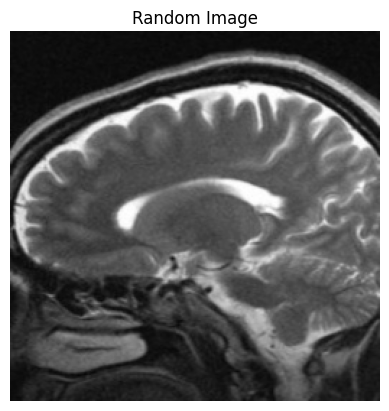

In [16]:
import matplotlib.pyplot as plt
import random
import cv2
# Specify the path to your image folder
image_folder = "/home/sagnik/ML_Folder/Brain Tumour detection using MRI images/Dataset/Demo"

# Create an empty list to store the images
images = []

# Loop through the files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith((".jpg", ".png", ".jpeg", ".bmp")):
        # Check if the file is an image (you can add more file extensions if needed)
        image_path = os.path.join(image_folder, filename)
        
        with Image.open(image_path) as img:
            
            img_array = np.array(img)
            images.append(img_array)

# Now, 'images' contains all the images from the folder



# Check if there are any images in the list
if not images:
    print("No image files found in the folder.")
else:
    # Select a random image from the list
    random_image =  random.choice(images) #images[10]
    #print(model.predict(random_image))
    print(type(random_image))
    print(random_image.shape)
    
    # Open and display the random image
    plt.imshow(random_image)
    plt.title('Random Image')
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()

# assuming x is your input data with shape (32, 256, 3)
random_image = random_image.reshape(-1, 256, 256, 3) # -1 means infer the batch size automatically
# now x has the shape (32, 256, 256, 3) and can be passed to the model


In [18]:
y_test_set = np.concatenate([test_set.next()[1] for i in range(test_set.__len__())])
y_test_set = y_test_set.astype(int)
y_test_set = y_test_set.reshape(len(y_test_set), 4)
print(y_test_set)

[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]


In [19]:
y_test_set.shape

(655, 4)

In [20]:
y_pred_new.shape

(655, 4)

In [21]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_test and y_pred are your true and predicted labels respectively
y_test_decoded = np.argmax(y_test_set, axis=1)
y_pred_decoded = np.argmax(y_pred_new, axis=1)

cm = confusion_matrix(y_test_decoded, y_pred_decoded)
accuracy_score(y_test_set, y_pred_new)
print(accuracy_score,"\n")
print(cm)


<function accuracy_score at 0x7f406fa52290> 

[[142   8   0   0]
 [  0 137  12   4]
 [  0   0 201   1]
 [  1   5   0 144]]
